In [1]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Hypothesis Testing (Recap)
In the previous lecture we discussed about `Hypothesis Testing`, which is just a fancy term for all the processes that we have done in past lectures. In the jury examples, we did `Hypothesis Test` even though we did not go through the formal steps. We will start with discussing about the formal steps for conducting a hypothesis test. 

## Testing a Hypothesis

#### Step 1: The Hypotheses
We have 2 views of how data were generated:
1. `Null hypothesis`: the data were obtained by random, by chance
2. `Alternative hypothesis`: something else happened, some effect other than chance

#### Step 2: The Test Statistic
Once we defined the 2 hypotheses, we select `test statistic`, a measure of how different our sample is from the population.

#### Step 3: The Sampling Distribution of the Test Statistic
1. What the test statistic might be if the null hypothesis were true
    * We simulate draws from the population to see the values of `test statistic`s that are likely to occur by chance. 
    * In Jury cases, we drew panel at random and ask "what's the TVD value that is likely to occur"?. Turns out the TVD between actual panel and the population did not look like a panel that is taken from random from population. Thus, we said that "this panel looks suspicious".

2. Approximate the sampling distribution (theorical distribution) by an empirical distribution
    * We can't calculate precisely the distribution of values of the test statistic
    * But we can approximate by drawing at random from the population

## Pick a number between 1 - 100
The number you pick would be the weirdness level. The greater the number, the weirder you are.

The instructor's number is 85. 

#### Is the instructor's weirdness level (85) likely to come from the classroom? 
1. The `population` is all the students in the classroom
2. Could the instructor be one of the students in the classroom?

## Testing Hypothesis
#### Step 1: The Hypotheses
* Null hypothesis: The instructor weirdness is randomly chosen from the population of the class
* Alternative hypothesis: It's not.

#### Step 2: The Test Statistic

`Test statistic`: Weirdness(higher number means more weird)

#### Step 3: The Sampling Distribution of the Test Statistic
* Look at the classroom
* Ask the students one by one each of their weirdness level

Let's say there are 50 students in the classroom. 3 of them picked 85 or above.

The chance we pick a student and obtain 85 is 3/50, or 6%, which is relatively low. From here, we can deduce whether the number 85 is likely to be obtained from the classroom. 

# Example: The 2 Hypotheses
**Gregor Mendel (1822-1884)** was an Austrian monk and founder of the modern field of genetics. Among many experiments, he tested the hypothesis that **pea plants will bear purple or white flowers at random, in the ratio purple to white 3 : 1**.

#### Was his model correct?

`Null hypothesis`: Mendel's model describes the world. In other words, the model is correct.
* If we grow pea plants at random, we'll get a ratio of 3:1 purple to white. 
* The distribution of the observed plant is different from the distribution in the model due to chance variation

`Alternative Hypothesis`: Mendel's model doesn't describe the world. Something else is on effect.

Mendel grew a bunch of pea plants and observed that about 75% of the plants were purple. Let's say he actually found 77% purple, then we can ask, "is that close enough to 75% that we can state that the ration is 3:1?" This is the question that we are trying to solve with the hypothesis test.

## Demo
The `null hypothesis` is that we drew plants in 3:1 ratio purple to white. 

In [2]:
null = make_array('Purple', 'Purple', 'Purple', 'White')
null

array(['Purple', 'Purple', 'Purple', 'White'], dtype='<U6')

Now let's try taking a sample of 10 from above.

In [3]:
sample = np.random.choice(null, 10)
sample

array(['Purple', 'Purple', 'Purple', 'Purple', 'Purple', 'Purple',
       'Purple', 'White', 'Purple', 'Purple'], dtype='<U6')

We would expect the sample above to have 7-8 purple. Let's convert the array above to `True and False` and count how many `True`s there are.

In [4]:
np.count_nonzero(sample == 'Purple')

9

Now divide the number above with the total number of sample we took. This way we obtain a proportion.

In [5]:
np.count_nonzero(sample == 'Purple') / 10

0.9

Mendel proposed that the number above should be 0.75. What if we did not obtain 0.75? We need to **measure how different the value that we obtain from 0.75** (This is our `test statistic`). 

In [6]:
np.count_nonzero(sample == 'Purple') / 10 - 0.75

0.15000000000000002

Above is our `test statistic`. If we try another sample,

In [7]:
sample = np.random.choice(null, 10)
print(sample)
print('We have', np.count_nonzero(sample == 'Purple'), 'Purple this time.')
difference = np.count_nonzero(sample == 'Purple') / 10 - 0.75
print('The difference is', difference)

['Purple' 'Purple' 'Purple' 'White' 'Purple' 'Purple' 'Purple' 'Purple'
 'Purple' 'Purple']
We have 9 Purple this time.
The difference is 0.15000000000000002


We are trying to measure the difference. We are trying to see if the model, 0.75, is correct or not. If the model was correct, we expect most of the result should appear around 0.75.

If the model was not correct, we can expect result that are significantly higher or lower than 0.75. (e.g. all purple, no purple at all)

When we compute the difference (`test statistic`, we can obtain a positive or negative `test statistic`. However, if we take the absolute value of the difference, we can only obtain a positive `test statistic` value. 

In [8]:
difference = abs(np.count_nonzero(sample == 'Purple') / 10 - 0.75)
difference

0.15000000000000002

1. If we took a sample and obtained no purple at all, that means we obtained a `test statistic` value of 0.75, since we are 0.75 away from the `theoretical test statistic`.
2. If we took a sample and obtained all purple, that means we obtained a `test statistic` value of 0.25, since we are 0.25 away from the `theoretical test statistic`.

The greater the `test statistic` value that we obtained, the more different result that we obtained from what Mendel proposed.

Below is a function that computes the `test statistic`.

In [9]:
def test_stat(sample):
    # Recall we took absolute value of the number of purple divided by 10 and subtract it by 0.75. However this time
    # instead of dividing it by 10, we divide it by the length of the sample.
    result = abs(np.count_nonzero(sample == 'Purple') 
                      / len(sample) 
                      - 0.75)
    return result

If we call the function above with an array of just purple, the return value would be 0.25. All purple means that the proportion of purple is 100%. And thus, when we calculate the `test statistic`, `abs(100% - 75%) = 25%`.

In [10]:
test_stat(make_array('Purple'))

0.25

For the opposite, with an array of just white, the return value would be 0.75. All white means that the proportion of white is 0%. Thus, when we calculate the `test statistic`, `abs(0% - 75%) = 75%`.

1. We have stated our null and alternative hypothesis
2. We have chosen the `test statistic` - the measure of difference
3. All that is left is to take draws from the population and see what we will obtain.

Mendel's actual result (observation) was 705 purple plants out of 929 total. 

In [11]:
observed = 705 / 929
observed

0.7588805166846071

This means Mendel's `test statistic` is,

In [12]:
observed_statistic = abs(observed - 0.75)
observed_statistic

0.008880516684607098

The `observed_statistic` is relatively low. However, how do we define `low`? We can find out by taking random draws from the population and to take a look at the result. Note that he planted 929 plants, and thus 929 would be our sample size.

In [13]:
total_plants = 929

We can simulate taking a sample of 929 plants,

In [14]:
np.random.choice(null, total_plants)

array(['White', 'Purple', 'White', 'Purple', 'Purple', 'White', 'Purple',
       'Purple', 'Purple', 'White', 'Purple', 'Purple', 'White', 'Purple',
       'Purple', 'Purple', 'Purple', 'Purple', 'Purple', 'Purple',
       'White', 'Purple', 'Purple', 'Purple', 'Purple', 'Purple',
       'Purple', 'Purple', 'Purple', 'Purple', 'White', 'Purple',
       'Purple', 'White', 'Purple', 'Purple', 'White', 'Purple', 'White',
       'Purple', 'White', 'Purple', 'White', 'White', 'Purple', 'Purple',
       'Purple', 'Purple', 'Purple', 'Purple', 'Purple', 'White',
       'Purple', 'White', 'Purple', 'White', 'Purple', 'Purple', 'Purple',
       'Purple', 'Purple', 'Purple', 'White', 'Purple', 'White', 'White',
       'Purple', 'Purple', 'Purple', 'White', 'White', 'Purple', 'Purple',
       'Purple', 'Purple', 'White', 'Purple', 'White', 'Purple', 'Purple',
       'Purple', 'Purple', 'Purple', 'Purple', 'Purple', 'Purple',
       'Purple', 'White', 'Purple', 'Purple', 'Purple', 'Purple',
      

we defined a function that computed the `test statistic` and thus, we can use that function to compute the `test statistic` of the sample above. Run the cell below multiple times to see varying `test statistic`s!

In [15]:
test_stat(np.random.choice(null, total_plants))

0.0072658772874057975

Since we want to repeat the "take sample and calculate `test statistic`" multiple times, we can write a `for` loop,

In [16]:
repetitions = 5000 # 5000 samples of 929 plants! 
sample_stats = make_array() # An array that will contain the resulting test statistics

for i in np.arange(repetitions):
    # Compute the test statistic and store in variable called "test_statistic"
    test_statistic = test_stat(np.random.choice(null, total_plants))
    # Append the "test_statistic" above to the array "sample_stats"
    sample_stats = np.append(sample_stats, test_statistic)
    
sample_stats

array([0.0040366 , 0.00134553, 0.04440258, ..., 0.00618945, 0.01264801,
       0.00995694])

Above, we have the array `sample_stats` that contains multiple `test statistics` from our multiple samples. We can create our null distribution witht the array above!

In [17]:
null_dist = Table().with_column('Null distribution', sample_stats)
null_dist

Null distribution
0.0040366
0.00134553
0.0444026
0.030409
0.00672766
0.00134553
0.00565124
0.00780409
0.0121098
0.0083423


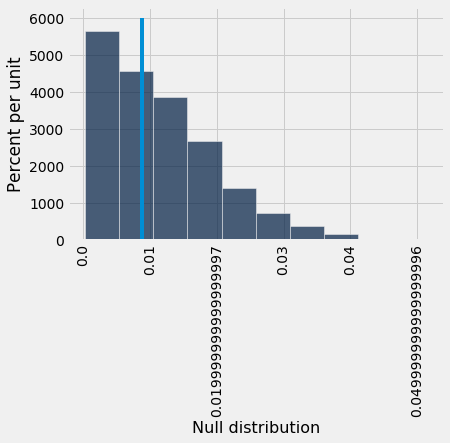

In [18]:
null_dist.hist()
_ = plt.plot([observed_statistic, observed_statistic], [0, 60])

Above is the histogram of our `test statistic`s. It seems that the typical `test statistic` value that we can get if we draw a random sample plant from Mendel's model is between 0 to 0.03. 

Mendel's `observed test statistic` is represented with the blue verical line. Mendel's `observed test statistic` is within the range of "likely to occur" test statistic values. In this case, we have an evidence in favor to Mendel's result.

Recall earlier we took the "weirdness level". The instructor's level was 85. We compared the instructor's 85 with the students' weirdness level in the class, and compute the probability of obtaining 85. 

We can calculate the probability of Mendel getting the `blue line` result or a weirder result. Just like in weirdness level example, we can compute the probability of obtaining 85 or greater.

#### What is a "good enough" result?
What if the vertical blue line is slightly more to the right? Does that mean Mendel's model is incorrect?

Let's say we tried to take a sample and we got a `test statistic` of 0.03.

In [19]:
tried_again = 0.03

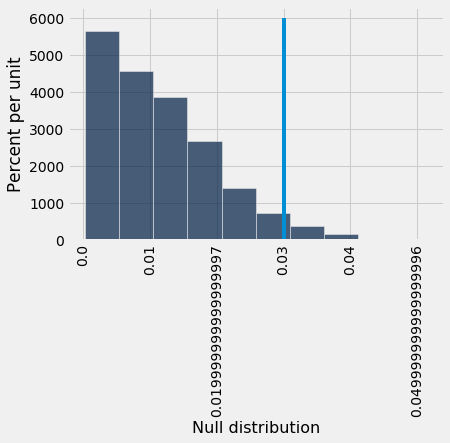

In [20]:
null_dist.hist()
_ = plt.plot([tried_again, tried_again], [0, 60])

If we obtained the result above result, do we accept or reject Mendel's model?

The further the vertical line goes the right, the less area covered by the right side of the line. Recall when we discussed about defining the `test statistic`: "The greater the `test statistic`, the weirder our result, or the more deviation we obtained from the proposed model".

We want to find the area of the following,
<img src = 'area.jpg' width = 400\>
and that will tell us the probability of obtaining our result if the null hypothesis were true.

This is similar to when we tried to analyze the weirdness level. We looked at students who picked weirdness level of 85 and above, and that tells us the probability of obtaining at least 85.

To calculate the area, we can use the **law of histogram**, which says that the area to the right of the blue line is the proportional values that are above the line.

If we look at the `sample_stats` once again from the simulation,

In [21]:
sample_stats

array([0.0040366 , 0.00134553, 0.04440258, ..., 0.00618945, 0.01264801,
       0.00995694])

We can find out the number of `test statistics` that are equal and above Mendel's `observed_statistic`,

In [22]:
observed_statistic

0.008880516684607098

In [23]:
sample_stats >= observed_statistic

array([False, False,  True, ..., False,  True,  True])

Once again, to calculate proportion,  we use `np.count_nonzero` and divide the result with the number of times we took sample.

In [24]:
np.count_nonzero(sample_stats >= observed_statistic) / len(sample_stats)

0.5548

This means the probability we can obtain the same result as Mendel's observation is the number above.

On the other hand, if we tried the same calculation with our own trial,

In [25]:
tried_again = 0.03

In [26]:
np.count_nonzero(sample_stats >= tried_again) / len(sample_stats)

0.0348

The probability of getting our result if the null hypothesis were true is relatively small!

Note that all this time, what we calculated had been the estimated probabilities. These estimated probabilities are called the `p-value`.

# P-values

## Conclusion of a Test
We have 2 hypothesese: `null` and `alternative`. How do we choose between the 2?

1. Compare the `observed test statistic` to its empirical distribution under the null hypothesis
    * Take the `observed test statistic` and see if it is likely to occur by chance if the null hypothesis were true

2. If the observed value is **inconsistent**, then we can **reject the null hypothesis**, leaving only the alternative
    * If the `observed test statistic` doesn't look like something that is likely to occur by chance, then reject the null hypothesis 
    
3. If the observed value is **consistent**, with the distribution, then the test does not support the `alternative` hypothesis
    * If the `observed test statistic` indeed looks like something that is likely to occur if the null hypothesis is true, then it does not support `alternative`
    * We can't conclude right away that the `null` hypothesis is true.
    
How do we determine to reject or "fail to reject" the `null` hypothesis?
1. Sometimes looking at the visualization is sufficient
2. At some other times, it is not easy to tell with just visualization alone. In this case, we use the "observance significance level", or `P-value`
    * The term **observance significance level** is just a fancy term that says: "What is the probability of obtaining our result if the `null` hypothesis were true. 
        * In the pea plant example, if the probability of purple to white is 3:1, then the probability of Mendel obtaining his result was 55%, while the probability of obtaining our result (recall `test statistic`: 0.03) is around 3%.

## Definition of P-value
The P-value is the `probability`,
1. under the `null hypothesis`,
2. That the `test statistic` is equal to the value that was observed in the data or is even further in the direction of the alternative

#### What if when we calculated the `test statistic`, we did not take the absolute value? How will our analysis change?

In [29]:
def test_stat(sample):
    # This time, we don't use the "abs"
    result = (np.count_nonzero(sample == 'Purple') 
                    / len(sample) 
                    - 0.75)
    return result

In [30]:
repetitions = 5000 # 5000 samples of 929 plants! 
sample_stats = make_array() # An array that will contain the resulting test statistics

for i in np.arange(repetitions):
    # Compute the test statistic and store in variable called "test_statistic"
    test_statistic = test_stat(np.random.choice(null, total_plants))
    # Append the "test_statistic" above to the array "sample_stats"
    sample_stats = np.append(sample_stats, test_statistic)
    
sample_stats

array([-0.01695371,  0.01318622,  0.00457481, ..., -0.0040366 ,
       -0.01049516, -0.00080732])

In [31]:
null_dist = Table().with_column('Null distribution', sample_stats)
null_dist

Null distribution
-0.0169537
0.0131862
0.00457481
-0.00188375
-0.00941873
0.0153391
0.00780409
0.00672766
-0.0083423
-0.0320237


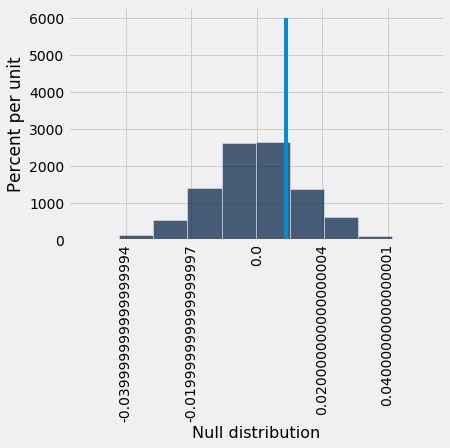

In [32]:
null_dist.hist()
_ = plt.plot([observed_statistic, observed_statistic], [0, 60])

Instead of resembling a stairs, the histogram this time resembles a bell curve! But what does this mean? How does this affect the `P-value`?

In [33]:
np.count_nonzero(sample_stats >= observed_statistic) / len(sample_stats)

0.2746

Above, the probability of obtaining Mendel's `observed test statistic` changes from around 55% to around 28%. What does this mean? Discuss on your own!

# Conventions of Consistency
We discussed about `P-value` and the probability that our result occur. But where is the exact cutoff between rejecting the null and "failing to reject" the null?

We define `inconsistent` to be when the `test statistic` is in the tail of the `null` distribution.

`In the tail`, first convention:
1. When the area in the tail is less than 5%, we can say that it is `inconsistent`
2. We say the result is `statistically significant`, or "the chance of obtaining the result is very low" given the null is true

`In the tail`, second convention:
1. To the more extreme, we define `inconsistent` as when the area of the tail is less than 1%
2. Here we say the result is `highly statistically significant`

Generally speaking, we choose our cutoff before running the experiment. 

Where do these conventions originated from?

## Sir Ronald Fisher, 1890 - 1962
<img src = 'ronald_fisher.jpg' width = 500\>

## Sir Ronald Fisher, 1925
<img src = "1925.jpg" width = 500\>
As we can see, there are no mathematical or statistical reason of choosing 5%. However, turns out 5% became the common cutoff for most academic journals and papers. In some fields (e.g. medicine), the cutoff is lower (e.g. 1%) since it involves high risk. In some others, (e.g. psychology), the cutoff is higher.

Usually 5% is the cutoff for `P-values`. Thus, if our `P-value` is below 5%, then we can say, "our data is too inconsistent from the null hypothesis", and thus we reject the null. On the other hand, if the `P-value` is greater than 5%, then we can say that the data is "not weird enough" that we fail to reject the null

## Sir Ronald Fisher, 1926
<img src = "1926.jpg" width = 500\>

# Error Probability
There is an alternative method of looking at the `P-value`. One way is to look at it as the **probability of obtaining our result given that the null hypothesis is true".

Another way to look at `P-value` is `Error Probability`. 

## Can the Conclusion be Wrong?
Sometimes, our conclusion can be wrong. Here are the possibilities of wrongness,
<img src = 'wrong.jpg' width = 500\>

Back to the "weirdness level" example. We want to know if the instructor's level 85 was drawn from the classroom. 

Possible mistakes:

1. The null is true, the instructor was drawn from the class
    * But then we run hypothesis test and the test rejects the null (e.g. the probability of getting 85 is too low)
    * This is a wrong conclusion
    
2. The `alternative` is true, the instructor was not drawn from the class
    * But when we run hypothesis test, the test doesn't reject the null, which suggest that the instructor was drawn from the class
    
The `P-value` measures mistake #1. If the `P-value` is 5%, that means there is a 5% chance that the **Null is true** but **the test rejects the null anyway**. 
* The lower the `P-value`, the better. This way, it gives us lower probability to have this kind of mistake

## An Error Probability
The cutoff for the P-value is an error probability

If:
1. Our cutoff is 5%
2. And the **null hypothesis happens to be true** (but we don't know this)

then there is about a 5% chance that **the test will reject the null hypothesis anyway**

This means if we run 20 experiments, there is 1/20 chance that the experiment will give a wrong conclusion.